# <center>python 邮件操作</center>

&ensp;&ensp;&ensp;邮件是我们日常工作中主要的沟通媒介之一。目前几乎所有编程语言都支持发送和接收电子邮件。 相信很多人都知道与邮件相关的两个协议：SMTP和POP3协议。谢希仁老师的计算机网络书上对电子邮件的工作过程阐述如下图:
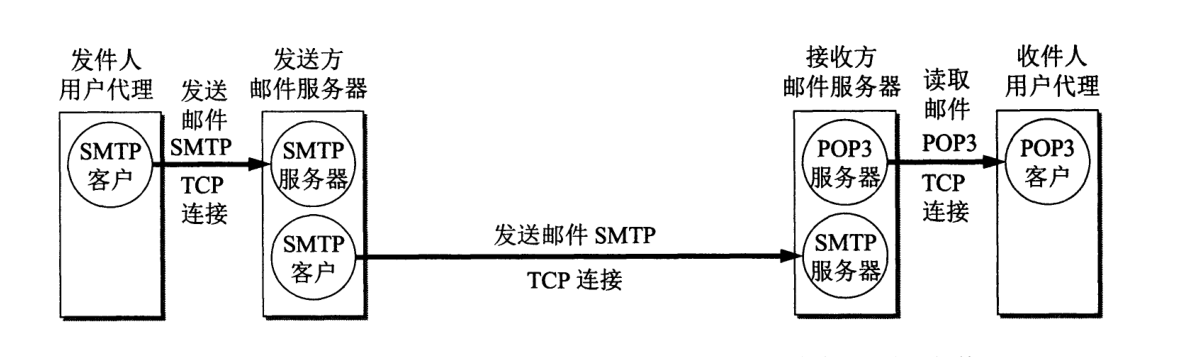
这个过程介绍了电子邮件的工作原理。其主要思想如下:
    建立连接--> 发送/接收邮件 --> 关闭连接

# 1. 发送电子邮件（SMTP）

Python对SMTP的支持有smtplib和email两个模块，email负责构造邮件，smtplib负责发送邮件。

Python创建SMTP对象的语法如下：```smtpObj=smtplib.SMTP([host [, port [, local_hostname]]])```。各个参数说明如下:<br>
- host：SMTP服务器主机。可以指定主机的IP地址或域名，是可选参数。<br>
- port：如果提供了host参数，就需要指定SMTP服务使用的端口号。一般情况下，SMTP的端口号为25。<br>
- local_hostname：如果SMTP在本地主机上，只需要指定服务器地址为localhost即可。<br>

如果在创建SMTP对象时提供了host和port两个参数，在初始化时会自动调用connect方法连接服务器。

Python SMTP对象使用sendmail方法发送邮件的语法如下：```SMTP.sendmail(from_addr, to_addrs, msg[, mail_options,rcpt_options]``` 。各个参数说明如下:<br>
- from_addr：邮件发送者的地址。<br>
- to_addrs：字符串列表，邮件发送地址。<br>
- msg：发送消息。msg是字符串，表示邮件内容。<br>

In [23]:
import smtplib
from email.mime.text import MIMEText
from email.header import Header
 
# 第三方 SMTP 服务（163邮箱或者qq邮箱）

mail_host="smtp.qq.com"  #设置服务器
mail_user="1603445918@qq.com"    #用户名
mail_pass="scdraaltxbymiihd"     #客户端授权码
 
sender = '1603445918@qq.com'
receivers = 'sinlearn_zhong@163.com'  # 接收邮件，可设置为你的QQ邮箱或者其他邮箱
 
message = MIMEText('嘿嘿，用python给你发来的一封垃圾邮件，请查收。', 'plain', 'utf-8')
message['From'] = sender
message['To'] =  receivers

subject = '恭喜你中奖1000元'
message['Subject'] = Header(subject, 'utf-8')
 
try:
    smtpObj = smtplib.SMTP() 
    smtpObj.connect(mail_host, 25)    # 25 为 SMTP 端口号
    smtpObj.login(mail_user,mail_pass)
    smtpObj.sendmail(sender, receivers, message.as_string())
    print ("邮件发送成功")
except smtplib.SMTPException as se:
    print (f"Error: 无法发送邮件{se}")

邮件发送成功


**由于163邮箱对垃圾邮件管控比较严格，试了几次从163往QQ发都会出现554错误。换了QQ邮箱就好一点了。此外，如果遇见：```[WinError 10061] 由于目标计算机积极拒绝，无法连接。``` 这个错误，可参考[这篇博客](https://blog.csdn.net/weixin_33894992/article/details/93780841).，配置代理。** 

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.header import Header
 
# 第三方 SMTP 服务（163邮箱或者qq邮箱）

mail_host="smtp.qq.com"  #设置服务器
mail_user="xxxxxxxxxxx@qq.com"    # 邮箱地址
mail_pass="ccccccccccc"          # 你的客户端授权码
 
sender = 'aaaaaaaaaa@qq.com'     # 发送方邮箱
receivers = 'bbbbbbbb@163.com'  # 接收邮件，可设置为你的QQ邮箱或者其他邮箱
 
message = MIMEText('嘿嘿，用python给你发来的一封垃圾邮件，请查收。', 'plain', 'utf-8')

message['From'] = sender
message['To'] =  receivers

subject = '恭喜你中奖1000元'
message['Subject'] = Header(subject, 'utf-8')
 
try:
    smtpObj = smtplib.SMTP() 
    smtpObj.connect(mail_host, 25)    # 25 为 SMTP 端口号
    smtpObj.login(mail_user,mail_pass)
    smtpObj.sendmail(sender, receivers, message.as_string())
    print ("邮件发送成功")
except smtplib.SMTPException as se:
    print (f"Error: 无法发送邮件{se}")

最后的结果:
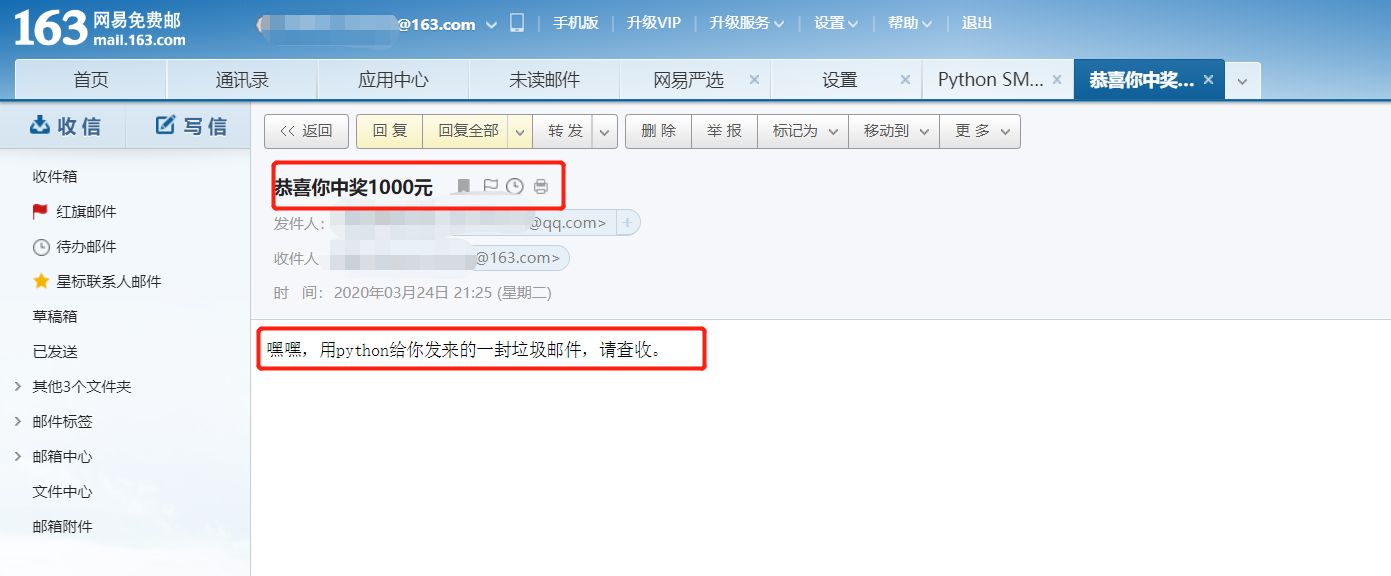

QQ邮箱客户端授权码的获取在设置-->账户 往下面翻能看到下面这个，开启POP3/SMTP 即可使用。
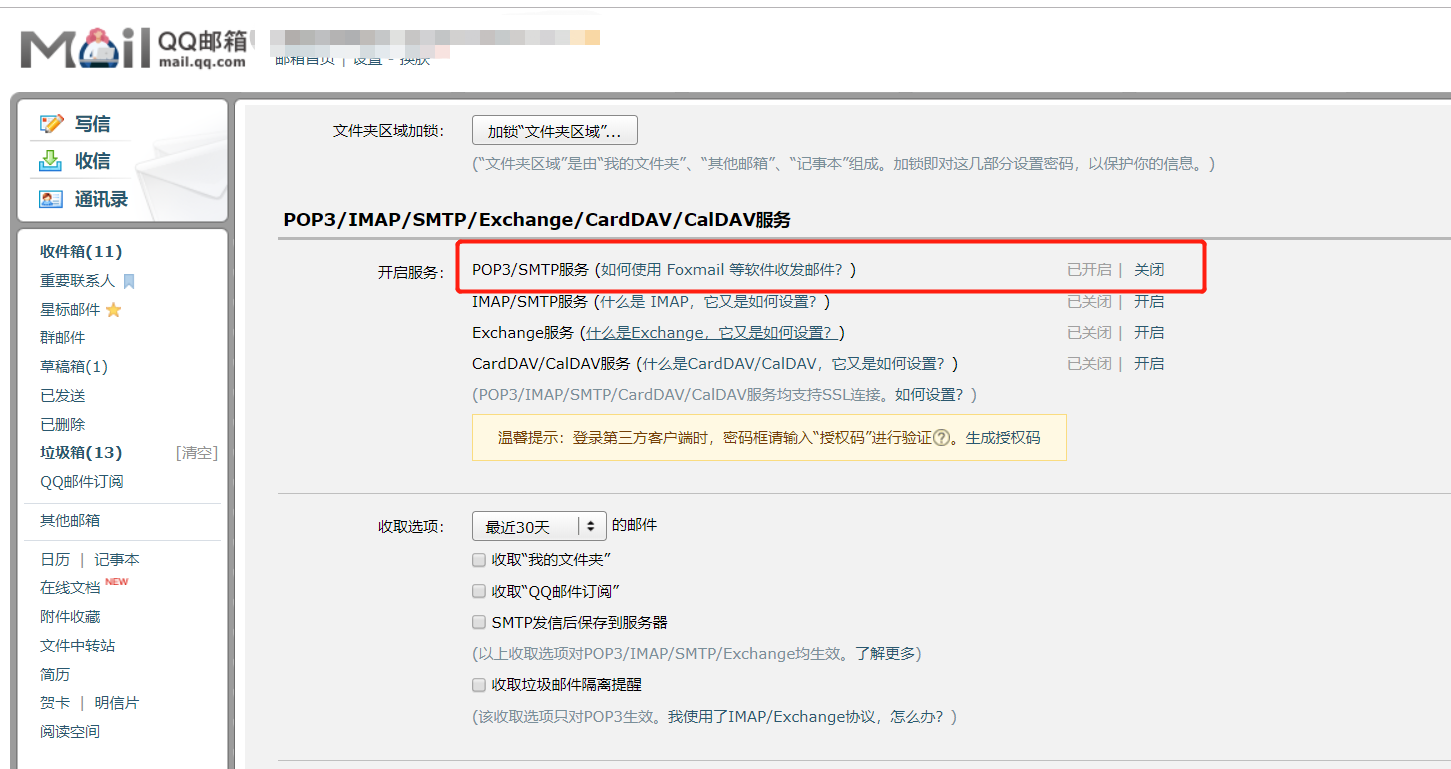

In [35]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email.header import Header
 
# 第三方 SMTP 服务（163邮箱或者qq邮箱）

mail_host="smtp.qq.com"  #设置服务器
mail_user="1603445918@qq.com"    #用户名
mail_pass="scdraaltxbymiihd"     #客户端授权码
 
sender = '1603445918@qq.com'
receivers = 'sinlearn_zhong@163.com'  # 接收邮件，可设置为你的QQ邮箱或者其他邮箱
 
#邮件正文内容
message  = MIMEMultipart()
message['From'] = sender
message['To'] =  receivers

subject = '带附件的邮件测试'
message['Subject'] = Header(subject, 'utf-8')

text= MIMEText('这是一封来自 Python 编写的带附件的测试邮件。', 'plain', 'utf-8')
message.attach(text)

# 构造附件1  
att1 = MIMEApplication(open('C:/Users/ASUS/Desktop/pythonfiletest/豆瓣电影top250.csv', 'rb').read())
att1.add_header('Content-Disposition', 'attachment', filename="豆瓣电影top250.csv")
message.attach(att1)
 
# 构造附件2 
att2 =MIMEApplication(open('C:/Users/ASUS/Desktop/pythonfiletest/data.json', 'rb').read())
att2.add_header('Content-Disposition', 'attachment', filename="data.json")
message.attach(att2)


 
try:
    smtpObj = smtplib.SMTP() 
    smtpObj.connect(mail_host, 25)    # 25 为 SMTP 端口号
    smtpObj.login(mail_user,mail_pass)
    smtpObj.sendmail(sender, receivers, message.as_string())
    print ("邮件发送成功")
except smtplib.SMTPException as se:
    print (f"Error: 无法发送邮件{se}")

邮件发送成功


In [37]:
# -----使用说明：-------------
#需要修改
# mail_user="aaaaaaaaa@qq.com"     
# mail_pass="cccccccccccccccc"      
# sender = 'aaaaaaaaaaaa@qq.com'
# receivers = 'bbbbbbbbbbbbbbg@163.com' 
#和附件的路径
# ----------------------------

import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email.header import Header
 
# 第三方 SMTP 服务（163邮箱或者qq邮箱）

mail_host="smtp.qq.com"           #设置服务器

mail_user="aaaaaaaaa@qq.com"     #用户名
mail_pass="cccccccccccccccc"     #客户端授权码
sender = 'aaaaaaaaaaaa@qq.com'
receivers = 'bbbbbbbbbbbbbbg@163.com'   
 
#邮件正文内容
message  = MIMEMultipart()
message['From'] = sender
message['To'] =  receivers

subject = '带附件的邮件测试'
message['Subject'] = Header(subject, 'utf-8')

text= MIMEText('这是一封来自 Python 编写的带附件的测试邮件。', 'plain', 'utf-8')
message.attach(text)

# 构造附件1  
att1 = MIMEApplication(open('C:/Users/ASUS/Desktop/pythonfiletest/豆瓣电影top250.csv', 'rb').read())
att1.add_header('Content-Disposition', 'attachment', filename="豆瓣电影top250.csv")
message.attach(att1)
 
# 构造附件2 
att2 =MIMEApplication(open('C:/Users/ASUS/Desktop/pythonfiletest/data.json', 'rb').read())
att2.add_header('Content-Disposition', 'attachment', filename="data.json")
message.attach(att2)


 
try:
    smtpObj = smtplib.SMTP() 
    smtpObj.connect(mail_host, 25)    # 25 为 SMTP 端口号
    smtpObj.login(mail_user,mail_pass)
    smtpObj.sendmail(sender, receivers, message.as_string())
    print ("邮件发送成功")
except smtplib.SMTPException as se:
    print (f"Error: 无法发送邮件{se}")

Error: 无法发送邮件(535, b'Login Fail. Please enter your authorization code to login. More information in http://service.mail.qq.com/cgi-bin/help?subtype=1&&id=28&&no=1001256')


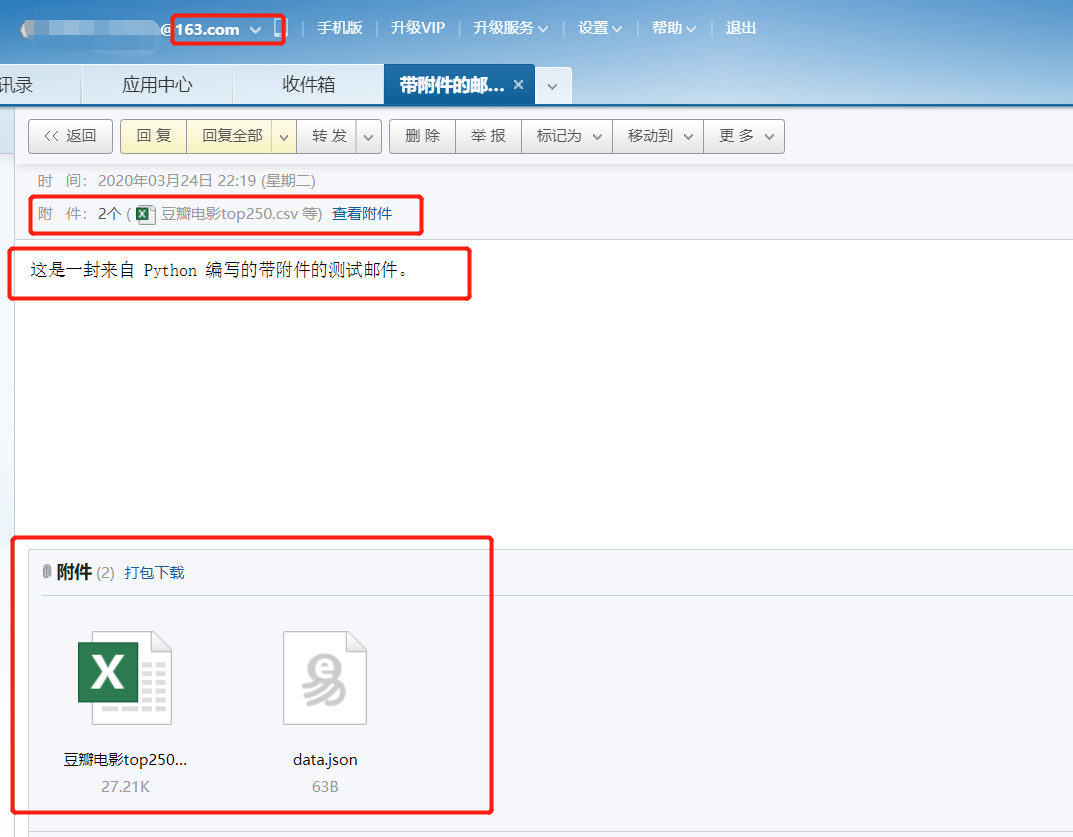

# 2. 接收电子邮件（POP3）

收取邮件就是编写一个MUA作为客户端，从MDA获取邮件到用户的计算机或手机上。收取邮件最常用的协议是POP，目前版本是3，俗称POP3。<br>
Python内置了一个poplib模块，用于实现POP3协议，可以直接用来收取邮件。<br><br>
**注意：** POP3协议收取的不是可以阅读的邮件，而是邮件的原始文本。这和SMTP协议很像，SMTP发送的也是经过编码后的一大段文本。要把POP3收取的文本变成可以阅读的邮件，还需要用email模块提供的各种类解析原始文本。收取邮件分为以下两个步骤：<br>
- （1）用poplib把邮件的原始文本下载到本地。<br>
- （2）用email解析原始文本，还原为邮件对象。<br>

In [40]:
# 对刚发往163邮箱的带附件的邮件进行解析，解析乱码为两个附件的内容。

# --------------  1 . 接收邮件 -----------------
import poplib
from email.parser import Parser

#输入邮件地址、口令和pop3服务器地址
email = "sinlearn_zhong@163.com"
password = "VRIAOWPJMHNKQEAF"
pop3_server = "pop3.163.com"

#连接到POP3服务器
server = poplib.POP3(pop3_server)
server.set_debuglevel(1)
print(server.getwelcome().decode('utf-8'))

#身份认证
server.user(email)
server.pass_(password)

# list()返回所有的邮件编号
resp, mails, octets = server.list()
print(mails)

#获取最新的一封邮件
index = len(mails)
resp, lines, octets= server.retr(index)

msg_content = b'r\n'.join(lines).decode('utf-8')
msg = Parser().parsestr(msg_content)

#server.dele(index)  #会远程删除邮箱中的邮件（POP3的设计思想是接收了，只有有查看就会删除。IMAP不会。）
server.quit()


# --------------  2.解析邮件 -----------------
from email.parser import Parser
from email.header import decode_header
from email.utils import parseaddr
import poplib 

# 2.1 邮件内容解析为Message对象
msg = Parser().parsestr(msg_content)
print(msg)

# 2.2 递归的输出Message对象的层次结构
def print_info(msg, indent=0):
    if indent == 0:
        for header in ['From', 'To', 'Subject']:
            value = msg.get(header, '')
            if value:
                if header == "Subject":
                    value = decode_str(value)
                else:
                    hdr, addr = parseaddr(value)
                    name = decode_str(hdr)
                    value = u'%s <%s>' %(name, addr) 
            print('%s %s' %(' ' *  indent ,header, value))  
    if (msg.is_multipart()):
        parts = msg.get_payload()
        for n, part in enumerate(parts):
            print('%spart %s' %(' ' *  indent, n))
            print('%s ----------' %(' ' *  indent))
            print_info(part, indent + 1) #递归调用
    else:
        content_type = msg.get_content_type()
        if content_type == 'text/plain' or content_type == 'text/html':
            content = msg.get_payload(decode=True)
            charset = guess_charset(msg)
            if charset:
                content = content.decode(charset)
                print('%s Text: %s ' %(' ' * indent, content + '...'))
            else:
                print('%s Attachment: %s' %(' ' * indent, content_type))
                
def decode_str(s):
    value, charset = decode_header(s)[0]
    if charset:
        value = value.decode(charset)
    return value

def guess_charset(msg):
    charset = msg.get_charset()
    if charset is None:
        content_type = msg.get('Content_Type', '').lower()
        pos = content_type.find('charset=')
        if pos >= 0:
            charset = content_type[pos + 8:].strip()
    return charset


+OK Welcome to coremail Mail Pop3 Server (163coms[10774b260cc7a37d26d71b52404dcf5cs])
*cmd* 'USER sinlearn_zhong@163.com'
*cmd* 'PASS VRIAOWPJMHNKQEAF'
*cmd* 'LIST'
[b'1 2033', b'2 2019', b'3 39897']
*cmd* 'RETR 3'
*cmd* 'QUIT'
Received: from qq.com (unknown [58.250.143.225])r
	by mx18 (Coremail) with SMTP id RMCowAAHBnd8KXpeHMgcBg--.44810S3;r
	Tue, 24 Mar 2020 23:38:36 +0800 (CST)r
DKIM-Signature: v=1; a=rsa-sha256; c=relaxed/relaxed; d=qq.com; s=s201512;r
	t=1585064316; bh=RqRNpkeA76GG/F+4nCiPUpuv0SbqDTkLxHT8TR14AJw=;r
	h=From:To:Subject;r
	b=UKfsdWRoynRPHIYA82edKejf79Me8y9d0qkY7OiBfNxIF2gWiGOFpRwBUpyUYFNpDr
	 7COWUGMxd3Fo0HZB3BI14BK2GeLl/GwGSuLJ9MQ7D+hHXH+aBc4cCm6iLhN2ppWmoDr
	 dpmYb2GxdF4bdydVCEiXAii556ZU/6rXpOiZxejE=r
Received: from [192.168.8.118] ([183.226.60.19])r
	by newxmesmtplogicsvrszb1.qq.com (NewEsmtp) with SMTPr
	id 9A32C435; Tue, 24 Mar 2020 23:38:35 +0800r
X-QQ-mid: xmsmtpt1585064315t2x53il10r
X-QQ-XMAILINFO: OYMG17oRwYK4qOHi99tJ/aiCb44OPfLhT6wk3Pj7ffKuOw6xlNWjUj4A2iM+